<table class="table table-bordered">
    <tr>
        <th style="width:200px;">
            <img src='https://bcgriseacademy.com/hs-fs/hubfs/RISE%202.0%20Logo_Options_25Jan23_RISE%20-%20For%20Black%20Background.png?width=3522&height=1986&name=RISE%202.0%20Logo_Options_25Jan23_RISE%20-%20For%20Black%20Background.png' style="background-color:black; width: 100%; height: 100%;">
        </th>
        <th style="text-align:center;">
            <h1>RISE2.0 Business and Data Analytics</h1>
            <h2>IU 3.6.5 Python 102 Pandas Datetime</h2>
        </th>
    </tr>
</table>

# Learning Objectives
#### After completing this lesson, you should be able to:
1. Manipulate date time and handle its format using Pandas
2. Understand and deal with Epoch time
3. Apply Datetime APIs in Pandas


# Table of Contents <a id='TC' />
1. [Date Time Manipulation using Pandas](#p1)
2. [Own datetime format handling](#p2)
3. [Dealing with Epoch Time](#p3)
4. [Manipulation using dates in Pandas DataFrame](#p4)
5. [Datetime APIs in Pandas ](#p5)
6. [Additional Examples](#p6)
7. [Hands-On Practice Exercise](#p7)

# 1. Date Time Manipulation using Pandas <a id='p1' />
## 1.1 Handling Dates
 -  Convert all the below format of dates into one format as a datetime datatype

In [2]:
import pandas as pd
dates = ['2017-01-05', 'Jan 5, 2017', '01/05/2017', '2017.01.05', '2017/01/05','20170105', 'abc']
pd.to_datetime(dates)

ValueError: time data "Jan 5, 2017" doesn't match format "%Y-%m-%d", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
dates = ['2017-01-05 2:30:00 PM', 'Jan 5, 2017 14:30:00', '01/05/2017', '2017.01.05', '2017/01/05','20170105']
pd.to_datetime(dates)

## 1.2 US date format :mm/dd/yyyy & Europe date format :dd/mm/yyyy

In [ ]:
pd.to_datetime('5/1/2017') #Default it will treat as US time

In [ ]:
# Convert into Europe dates
pd.to_datetime('5/1/2017', dayfirst=True)

# 2. Own datetime format handling <a id='p2' />

## 2.1 Own datetime format

In [ ]:
# What if you have your own date time format?
d = '5$1$2017'
d1 = '5#1#2017'
#pd.to_datetime(d) #Will throw an exception
pd.to_datetime(d, format = '%d$%m$%Y')
#pd.to_datetime(d1, format = '%d#%m#%Y')

## 2.2 Invalid string in dates

In [ ]:
dates = ['2017-01-05', 'Jan 5, 2017', '01/05/2017', '2017.01.05', '2017/01/05','abc']
#pd.to_datetime(dates) #This will throw an error 

In [ ]:
pd.to_datetime(dates, errors='ignore')# This will ignore all the dates

In [ ]:
pd.to_datetime(dates, errors='coerce')#This will include all but 'abc'

# 3. Dealing with Epoch Time <a id='p3' />
- Epoch or Unix time means number of seconds that have passed since Jan 1, 1970 00:00:00 UTC time 
- https://www.epochconverter.com

In [ ]:
t = 1533204613
pd.to_datetime(t, unit='s')#Default is 'ns' #unit : string, default 'ns'

In [ ]:
# Get the datetimeindex
t = 1533204613
dt = pd.to_datetime([t], unit='s')
dt

In [ ]:
# Convert datetimeindex back to epoch time
dt.view('int64')#it will append the nanoseconds by default

# 4. Manipulation using dates in Pandas DataFrame <a id='p4' />
- Below dataset doesn't have dates but we know that it has data for date 1st June to 30th June


In [ ]:
import pandas as pd
df = pd.read_csv("./data/HistoricalQuotes_Apple_TimeSeries_DateRange_NoDates.csv")
df.head()

## 4.1 Inserting date using date_range function

In [ ]:
# freq- B means business days..which excludes weekends but includes holidays
rng = pd.date_range(start= "6/1/2017", end="6/30/2017", freq='B') 
rng

## 4.2 Can also be used for indexing - if dates are in index

In [ ]:
# set date as index
df.set_index(rng,inplace=True)
df.head()

In [ ]:
print(df["2017-06-01":"2017-06-10"])
print('----'*20)
print("Mean of 10 days closing price is {}".format(df["2017-06-01":"2017-06-10"].Close.mean()))

## 4.3 Using asfreq to fill and generate data - 'pad' will copy the previous value to missing date
- http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

In [ ]:
df.asfreq('D', method='pad') #'D' means all days
# Use H for generating Hourly 
df.asfreq('H', method='pad') #'D' means all days

## 4.4 Creating by range and not by end date

In [ ]:
rng = pd.date_range(start= "1/1/2017", periods=72, freq='B') #generate 72 business days
rng

## 4.5 Also holidays and offset can be used from pandas functions
- https://github.com/pandas-dev/pandas/blob/master/pandas/tseries/holiday.py

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

## 4.6 Removing 4th of July from generated data

In [ ]:
usb = CustomBusinessDay(calendar=USFederalHolidayCalendar())
usb

In [ ]:
rng = pd.date_range(start="7/1/2017",end="7/21/2017",freq=usb) #now it will remove 4th July!!
rng

## 4.7 Creating custom holiday calendar 
- Below code will remove 15th April from generated dates

In [ ]:
from pandas.tseries.holiday import AbstractHolidayCalendar, nearest_workday, Holiday
class myCalendar(AbstractHolidayCalendar):
    rules = [
        Holiday('My Birth Day', month=4, day=15),#, observance=nearest_workday),
    ]
    
my_bday = CustomBusinessDay(calendar=myCalendar())

In [ ]:
pd.date_range('4/1/2017','4/30/2017',freq=my_bday)

# 5. Datetime APIs in Pandas <a id='p5' />

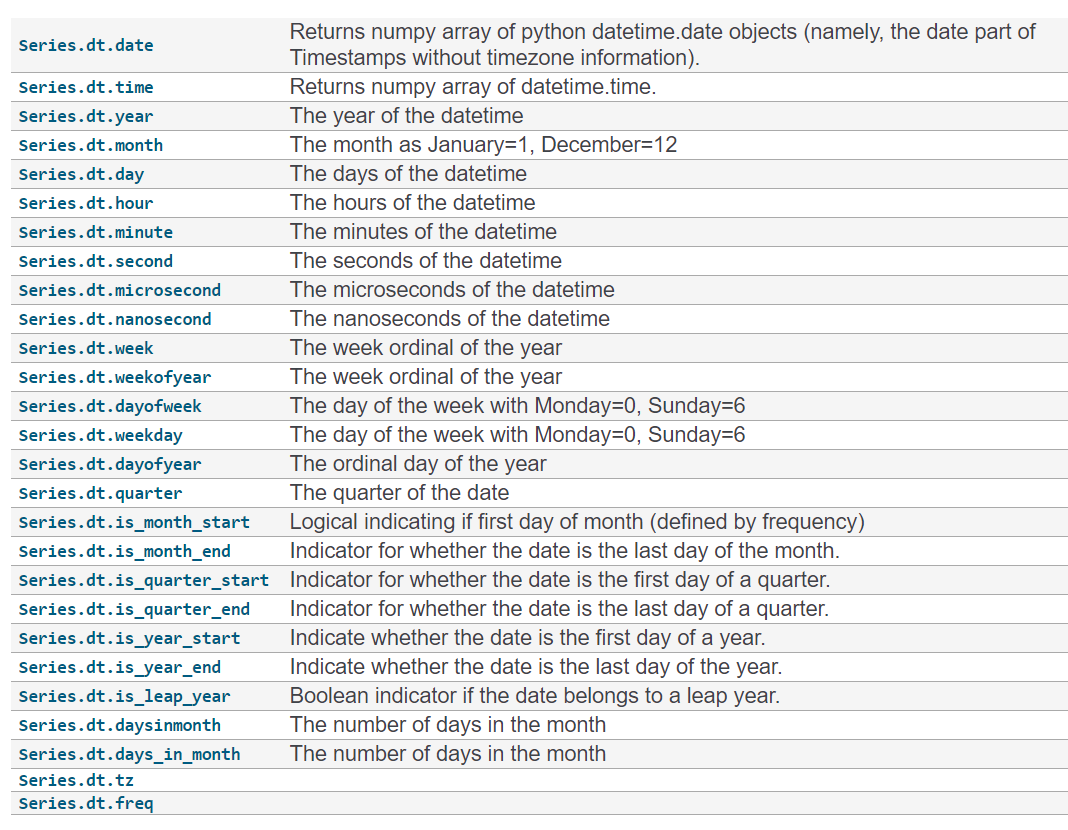

In [ ]:
import pandas as pd
train = pd.read_csv("./data/HistoricalQuotes_Apple_TimeSeries_DateRange.csv")

In [ ]:
train.head()

## 5.1 Using to_datetime: Converting Date column from object to Datetime

In [ ]:
train['DateConverted'] = pd.to_datetime(train['Date'])

In [ ]:
train.head()

## 5.2 Using dayofweek as example

In [ ]:
train['DayWeek'] = train['DateConverted'].dt.dayofweek
train.head()

# 6. Additional Examples <a id='p6' />

## 6.1 Managing timezones

In [ ]:
# Create a datetime object with time zone information
dt = pd.to_datetime("2022-12-09 12:00:00", utc=True)

# Access the time zone information for the datetime object
tz = dt.tz

# Print the time zone name
print(tz.tzname(dt))

# Print the time zone offset
print(tz.utcoffset(dt))

# Check if the time zone is daylight savings time
print(tz.dst(dt))

In [ ]:
# Create a datetime object with time zone information
dt = pd.to_datetime("2022-12-09 12:00:00", utc=True)

# Use the pd.dt.tz attribute to convert the datetime object to a different time zone
dt_eastern = dt.tz_convert("US/Eastern") # see below to get other time zones

# Print the converted datetime object
print(dt_eastern)

In [ ]:
# Create a datetime object with time zone information
dt = pd.to_datetime("2022-12-09 12:00:00", utc=True)

# Use the dt.tz_convert() method to convert the datetime object to a different time zone
dt_sgt = dt.tz_convert("Asia/Singapore")

# Print the converted datetime object
print(dt_sgt)

In [ ]:
import pytz

print('All Timezones')

for timeZone in pytz.all_timezones_set:
    print(timeZone)

In [ ]:
print('Most commonly used timezones')
for timeZone in pytz.common_timezones:
    print(timeZone)

## 6.2 Import holidays from ICS file into Calendar

In [ ]:
# run only once to install icalendar library
!pip install icalendar

In [ ]:
from pandas.tseries.offsets import CustomBusinessDay
from icalendar import Calendar
from datetime import datetime, timedelta

# Open the .ics file and parse it into a Calendar object
with open("./data/sg_hol_2023.ics", "rb") as f:
    cal = Calendar.from_ical(f.read())

# Create a list of holiday dates from the Calendar object
dates = [event.get("dtstart").dt for event in cal.walk("VEVENT")]

In [ ]:
sunday_hols = [] # create empty list to store holidays on Sundays

# identify all holidays that falls on Sundays and store them in sunday_hols list
for date in dates:
    if date.weekday() == 6:
        sunday_hols.append(date)

monday_off = [] # create empty list to store holiday off observed on Monday
for date in sunday_hols:
    monday_off.append(date + timedelta(days=1))

monday_off

In [ ]:
# append Monday offs in dates
for each in monday_off:
    dates.append(each)

dates.sort()
dates

In [ ]:
# Create a CustomBusinessDay object using the list of dates
bday = CustomBusinessDay(holidays=dates)

# Use the CustomBusinessDay object to create a DatetimeIndex
idx = pd.date_range(start="2023-01-01", end="2023-12-31", freq=bday)

# Create a DataFrame using the DatetimeIndex
df = pd.DataFrame(index=idx)
df

# 7. Hands-On Practice Exercise <a id='p7' />

This hands-on practice exercise summarizes data manipulation using Pandas.

**1. Load the given dataset using pandas and create a column name “change”**

* "change" is difference between columns “Open” and “close”

* Dataset: __InputData.csv__

In [ ]:
# solution 1


**2. Solve below using pandas dataframes**

i. Find the count of cars whose Type=’Sedan’ & Category= ‘Sedan 4D’.

ii. Find the details(Price,Mileage,Make,Model,Category,Type) of the cars  in each ‘Category’ whose ‘Price’ is highest and Type=’Sedan’

iii. Find the details(Price,Mileage,Make,Model,Category,Type) of the cars  in each ‘Category’ whose ‘Price’ is Second highest and Type=’Sedan’

iv. Find all details (Price, Mileage,Make,Model,Category,Type) of the cars  whose price is greater than 15000 in each ‘Category’.

v. Find all details(Price,Mileage,Make,Model,Category,Type) of the cars  in the ‘Category’ = ‘CX Sedan’ whose price is greater than the highest pricing car in Category=’Sedan 4D’

Dataset: __cars.xls__

In [ ]:
# solution 2


In [ ]:
### Count of cars whose Type = 'Sedan' & Category = 'Sedan 4D'



In [ ]:
## Find the details(Price,Mileage,Make,Model,Category,Type) of the cars in each ‘Category’ whose ‘Price’ is highest and Type=’Sedan’


In [ ]:
## Find the details(Price,Mileage,Make,Model,Category,Type) of the cars in each ‘Category’ whose ‘Price’ is Second highest and Type=’Sedan’


In [ ]:
#Find all details (Price, Mileage,Make,Model,Category,Type) of the cars  whose price is greater than 15000 in each ‘Category’.


In [ ]:
# Find all details(Price,Mileage,Make,Model,Category,Type) of the cars in the ‘Category’ = ‘CX Sedan’ whose price is greater than the highest pricing car in Category=’Sedan 4D’


In [ ]:
#### No cars have more price

**3. Solve below using pandas dataframes:**

i. Select all the records (using dataset(airport.xlsx)) whose ‘iso_region ‘ = ‘US-CA’ & ‘type’ = ‘seaplane_base’

ii. Select ident, name, municipality (using dataset(airport.xlsx)) from all the records whose ‘iso_region ‘ = ‘US-CA’ & ‘type’ = ‘large_airport’

iii. Select all the records (using dataset(airport-frequencies.xlsx)) whose ‘airport_ident’ = ‘KLAX’ by sorting the records descendingly by ‘Type’

Datasets: __airports.csv__ and __airport-frequiencies.csv__

In [ ]:
#Solution 3

# Answer of I


# Answer of II


# Answer of III



**4. Solve below using pandas dataframes:**

i. What was the maximum temperature in New York in the month of January?

ii. On which day it rained?

iii. What is the average wind speed?

Dataset: __weather.csv__

In [ ]:


# Answer of I


# Answer of II



# Answer of II



**5. Manipulate Date & Time data**

i. First convert the type of date to TimeStamp object.

ii. Change index to date column

iii. Retrieve Jan 2017 stock prices

iv. Average price of Apple stock in Jan 2017(Close field)

v. Get me the prices of last week of Jan 2017

Dataset: __HistoricalQuotes_Apple_TimeSeries_Datetimeindex.csv__

In [ ]:
# Answer of I

# Answer of II

# Answer of III


##### The End
[Back to Content](#TC)

Copyright © 2023 by Boston Consulting Group. All rights reserved.